# Inaugural Project - Codenomics Crew

Imports and set magics:

In [18]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

Illustrating the set in the Edgeworth box

In [79]:
from inauguralproject import ExchangeEconomyClass
model = ExchangeEconomyClass()

N = 75
x_grid = np.linspace(0,1,N+1)



# Calculate initial utilities:
u_A_initial = model.utility_A(model.par.w1A, model.par.w2A)
u_B_initial = model.utility_B(model.par.w1B, model.par.w2B)

pareto_improvement = [] #Initialise empty list to store pareto improvements

# Iterate through redistributions
for x1A in x_grid:
    for x2A in x_grid:

        # Ensure total endowment of each good is 1
        x1B = 1 - x1A
        x2B = 1 - x2A

        # Calculate utilities
        u_A = x1A**model.par.alpha * x2A**(1-model.par.alpha)
        u_B = x1B**model.par.beta * x2B**(1-model.par.beta)

        # Check for Pareto improvement
        if u_A > u_A_initial and u_B > u_B_initial:
            pareto_improvement.append((np.array([x1A, x2A]), np.array([x1B, x2B])))

# for allocation in pareto_improvement:
#    print("Consumer A's allocation:",allocation[0], "| Consumer B's allocation:", allocation[1])

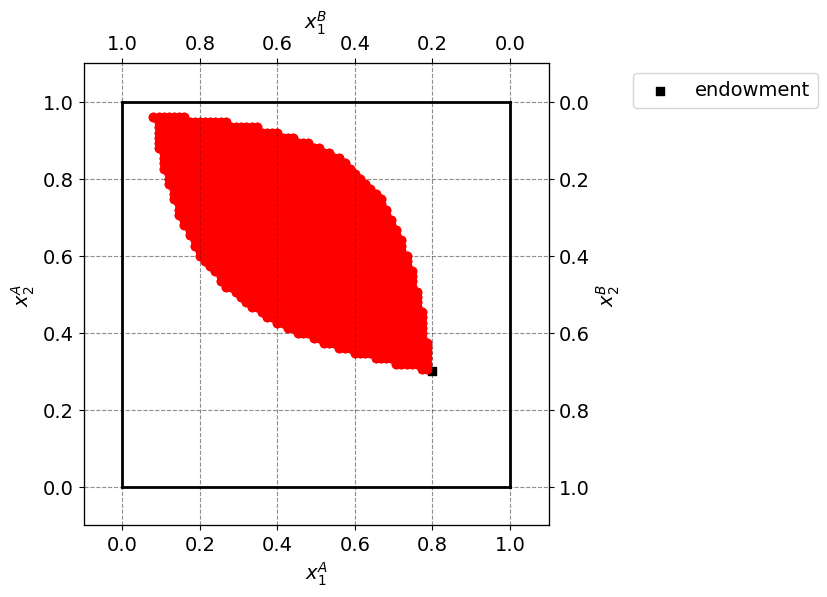

In [22]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
for allocation in pareto_improvement:
    ax_A.scatter(allocation[0][0], allocation[0][1], marker='o', color='red')
    ax_B.scatter(allocation[1][0], allocation[1][1], marker='o', color='red')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

# Question 2

Calculating the error in the market clearing conditions

In [75]:
P1 = np.linspace(0.5,2.5,N+1)

eps1 = []
eps2 = []
p_1 = []

for p1 in P1:

    demandA1, demandA2 = model.demand_A(p1)
    demandB1, demandB2 = model.demand_B(p1)

    eps1.append(demandA1-model.par.w1A+demandB1-model.par.w1B)
    eps2.append(demandA2-model.par.w2A+demandB2-model.par.w2B)
    p_1.append(p1)

print(eps1)

[0.533333333333333, 0.47594936708860747, 0.42409638554216855, 0.3770114942528735, 0.33406593406593377, 0.2947368421052629, 0.2585858585858586, 0.22524271844660193, 0.19439252336448576, 0.16576576576576557, 0.13913043478260856, 0.11428571428571421, 0.09105691056910548, 0.06929133858267705, 0.048854961832061006, 0.029629629629629395, 0.011510791366906414, -0.00559440559440566, -0.021768707482993255, -0.037086092715232055, -0.05161290322580642, -0.06540880503144664, -0.07852760736196335, -0.09101796407185642, -0.1029239766081873, -0.11428571428571443, -0.12513966480446936, -0.1355191256830603, -0.14545454545454545, -0.15497382198952886, -0.16410256410256419, -0.17286432160804022, -0.18128078817734006, -0.1893719806763286, -0.19715639810426555, -0.20465116279069773, -0.21187214611872152, -0.2188340807174889, -0.22555066079295166, -0.2320346320346321, -0.23829787234042554, -0.24435146443514655, -0.2502057613168725, -0.2558704453441297, -0.2613545816733069, -0.2666666666666666, -0.2718146718

# Question 3

Finding the market clearing price

In [77]:
def square(list):
    return [i ** 2 for i in list]

eps1_sqr = square(eps1)
eps2_sqr = square(eps2)

eps1_min = min(eps1_sqr)
eps2_min = min(eps2_sqr)

print(eps1_min, eps2_min)

min_index = eps1_sqr.index(eps1_min)
optimal_price = P1[min_index]

print(optimal_price)


3.129737395471735e-05 2.844444444444647e-05
0.9533333333333334


ADD CONCISE CONLUSION.